## *Questions For Investigation*
### Mack Damavandi <br> February 26, 2019

**1**. What is our independent variable? What is our dependent variable?
> **Answer:** The independent variable is the congruency of the words (whether or not the color of the font matches the word that is spelled out). The dependent variable is the speed at which the test subject can identify the color of the font of each word.

**2**. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
> **Answer:** An appropriate null hypothesis for this project would be that the mean duration for completing the Stroop task given congruent words is equal to the mean duration of completing the Stroop task given incongruent words. The alternative hypothesis is that the mean duration of the Stroop task differs between congruent and incongruent words. I would expect to perform a two-sided T-test for this hypothesis test.
<br>H<sub>0</sub>: $\mu$<sub>Congruent</sub> $-$ $\mu$<sub>Incongruent</sub> $=$ 0<br> H<sub>A</sub>: $\mu$<sub>Congruent</sub> $-$ $\mu$<sub>Incongruent</sub> $\not =$ 0<br>$\alpha =$ 0.05

My durations for the Stroop task were:
* Congruent words: 22.499 seconds
* Incongruent words: 26.38 seconds

**3**. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.
> **Answer:** The pandas package of Python has a nice function called describe() which will provide the mean, standard deviation, and IQR of both the Congruent and Incongruent data. After importing a few packages, I'll execute the following code to read the CSV in and output the descriptive statistics.
    
    stroop = pd.read_csv('stroopdata.csv')
    stroop.describe()

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from math import sqrt
%matplotlib inline

In [2]:
stroop = pd.read_csv('stroopdata.csv')
stroop.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


**4**. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.
> **Answer:** I'll use a package called seaborn to render plots of the distributions.

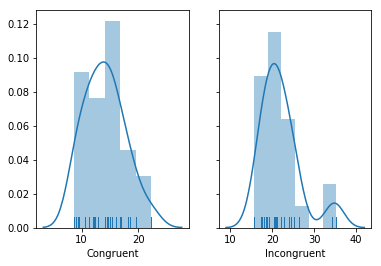

In [3]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.distplot(stroop['Congruent'], rug=True, ax=ax1)
sns.distplot(stroop['Incongruent'], rug=True, ax=ax2)

> **Answer cont.:** As we can see from these kernel density estimation (KDE) plots, we have a pretty good grouping on both the congruent and incongruent data. The distributions are both approaching a normal distribution, with the incongruent data showing a slight second grouping between 30 and 40 seconds.

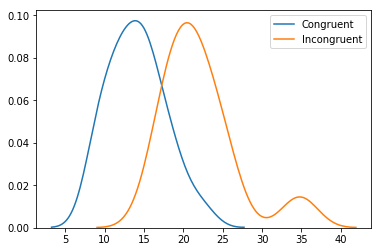

In [4]:
sns.kdeplot(stroop['Congruent'])
sns.kdeplot(stroop['Incongruent'])
plt.legend()

> **Answer cont.:** I liked this visualization so I decided to include it as well. It plots the KDE functions in the same plot. This helps to support my theory that the mean duration for completing the Stroop task with incongruent words is greater than the mean duration of completing the task with congruent words.

**5**. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

> **Answer:** I want to test whether or not the mean duration of completing the Stroop task with congruent words is the same as the mean duration of completing the Stroop task with incongruent words. Below is the setup for my hypothesis test. <br>H<sub>0</sub>: $\mu$<sub>Congruent</sub> $-$ $\mu$<sub>Incongruent</sub> $=$ 0<br> H<sub>A</sub>: $\mu$<sub>Congruent</sub> $-$ $\mu$<sub>Incongruent</sub> $\not =$ 0<br>$\alpha =$ 0.05

In [5]:
stroop['Difference'] = stroop['Congruent'] - stroop['Incongruent']

In [6]:
point_estimate = stroop['Difference'].mean()

In [7]:
standard_deviation = stroop['Difference'].std(ddof=1) 
# ddof=1 lets the function know to use degrees of freedom = 1 when calculating the standard deviation

In [8]:
t_stat = point_estimate / (standard_deviation / sqrt(stroop['Difference'].count()))

In [9]:
t_critical = (
    stats.t.ppf(q=0.025, df=stroop['Difference'].count()-1), # q=0.025 comes from alpha equal to 0.05
    stats.t.ppf(q=1-0.025, df=stroop['Difference'].count()-1)
)

In [10]:
reject = t_stat < t_critical[0] or t_stat > t_critical[1] 

In [11]:
p_value = stats.t.cdf(x=t_stat, df=23) + (1 - stats.t.cdf(x=-t_stat, df=23))

In [12]:
confidence_interval = (
    point_estimate + t_critical[0] * standard_deviation / sqrt(stroop['Difference'].count()),
    point_estimate + t_critical[1] * standard_deviation / sqrt(stroop['Difference'].count())
)
print('T-statistic: ', t_stat)
print('P-value: ', p_value)
print('Critical values: ', t_critical)
print('Confidence interval: ', confidence_interval)
print('Reject? ', reject)

T-statistic:  -8.020706944109957
P-value:  4.1030005847219926e-08
Critical values:  (-2.068657610419041, 2.0686576104190406)
Confidence interval:  (-10.019027909364912, -5.910555423968423)
Reject?  True


> **Answer cont.:** We reject the null hypothesis, since our t-statisitic falls within the critical region. Since the p-value is less than our alpha of 0.05, we can conclude that our results are statistically significant and our evidence against the null hypothesis is strong.<br><br>
At the alpha 0.05, we can be 95% certain that the mean difference is between $-$10.02 and $-$5.911 seconds. In other words, performing the Stroop task with incongruent words will be on average 10 to 6 seconds slower than performing the Stroop task given congruent words. The critical values used in calculating this confidence interval were $\pm$2.069.<br><br>
The results did match up with my expectations for the experiment. When I performed the Stroop task, I experienced much more difficulty with the incongruent words than the congruent words. At first glance, the data seemed to suggest that was the case in general also. After performing the hypothesis test, we can be sure that it will take longer when identifying the colors from the incongruent words.

### Resources Used

* https://www.markdownguide.org/
* https://pandas.pydata.org/pandas-docs/stable/index.html
* https://seaborn.pydata.org/tutorial/distributions.html
* https://jakevdp.github.io/PythonDataScienceHandbook/
* https://docs.scipy.org/doc/scipy/reference/
* Udacity Lecture L10a